In [1]:
import json

data1 = json.load(
    open("/data_users1/asmithh/final_packs_with_creation_dates.json", "r")
)

In [2]:
len(data1)

301322

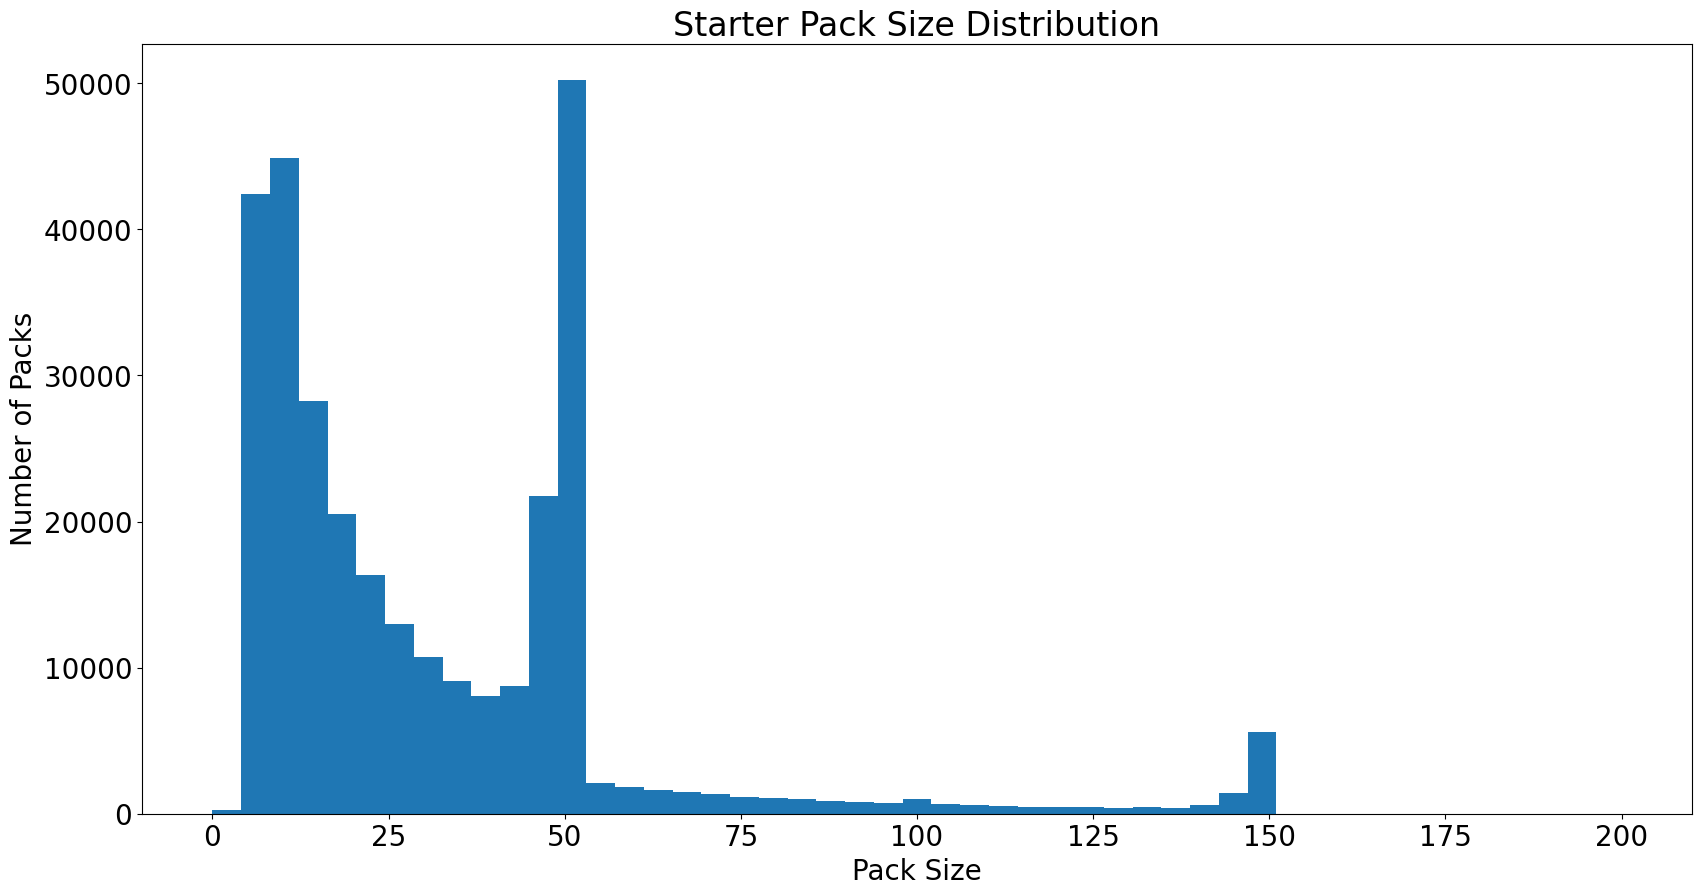

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["font.size"] = 20
plt.hist([len(sp["members"]) for sp in data1], bins=np.linspace(0, 200, 50))
plt.title("Starter Pack Size Distribution")
plt.xlabel("Pack Size")
plt.ylabel("Number of Packs")
plt.savefig("bsky_plots/starter_pack_sizes_linear_scale.png")

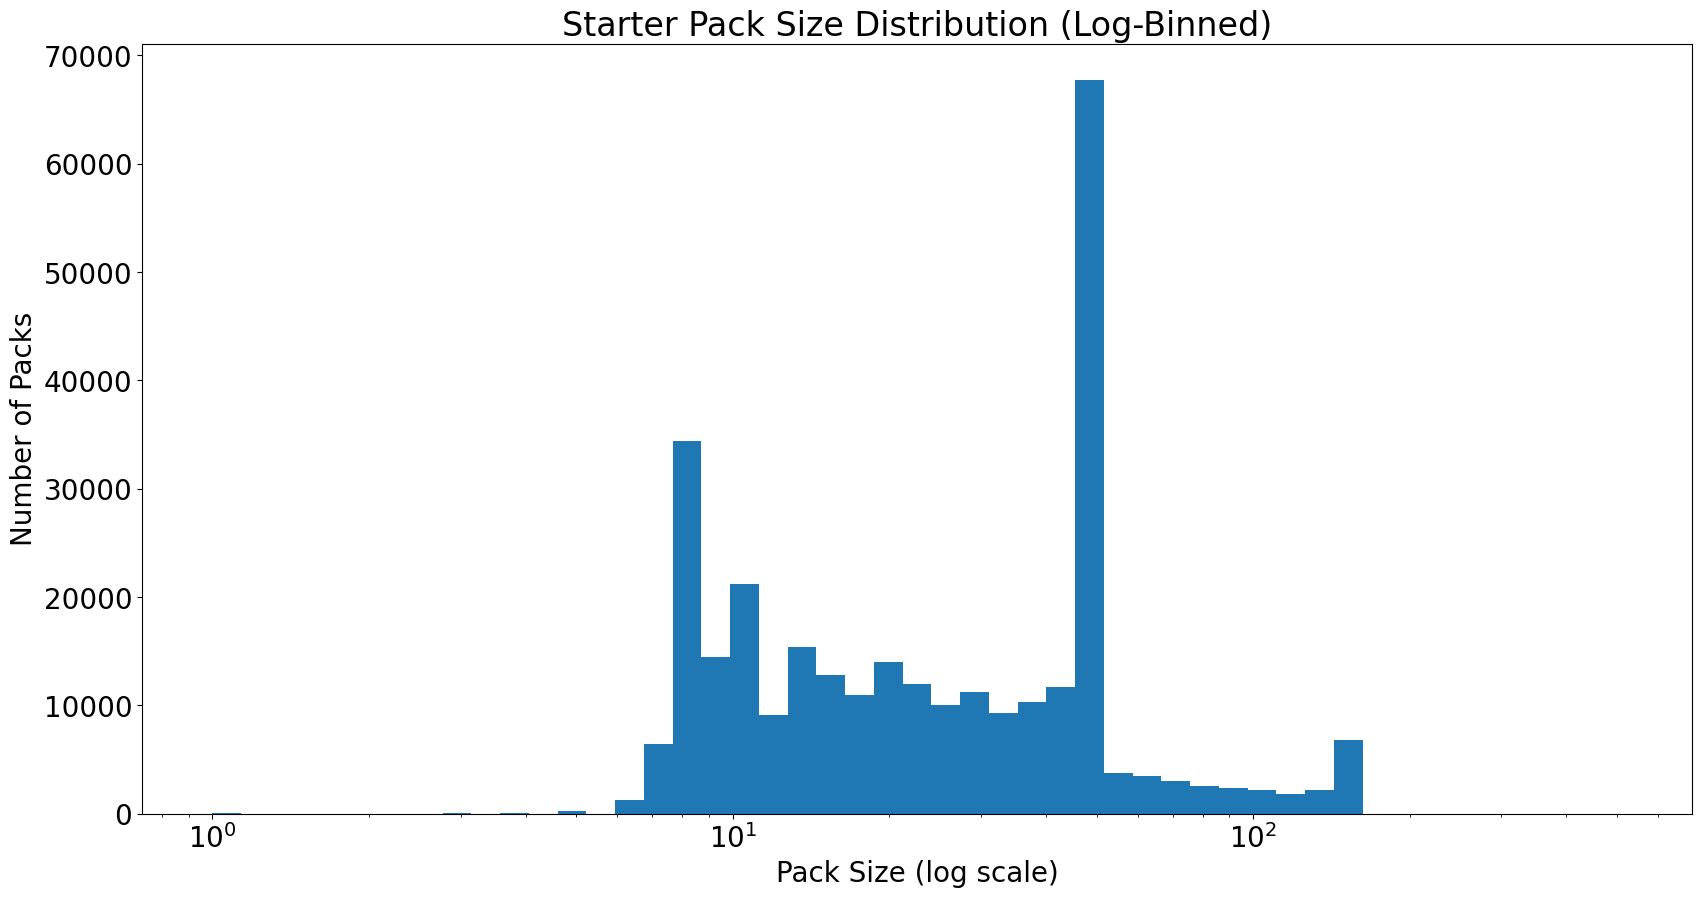

In [4]:
import matplotlib.pyplot as plt

plt.hist(
    [len(sp["members"]) for sp in data1], bins=np.logspace(np.log(1), np.log(15), 50)
)
plt.gca().set_xscale("log")
plt.title("Starter Pack Size Distribution (Log-Binned)")
plt.xlabel("Pack Size (log scale)")
plt.ylabel("Number of Packs")
plt.savefig("bsky_plots/starter_pack_sizes_log_log.png")

In [5]:
packs_per_user = {}

for sp in data1:
    for u in sp["members"]:
        if u["did"] in packs_per_user:
            packs_per_user[u["did"]] += 1
        else:
            packs_per_user[u["did"]] = 1

In [6]:
pack_count_per_user = [v for v in packs_per_user.values()]
np.mean(pack_count_per_user), np.median(pack_count_per_user), np.min(
    pack_count_per_user
), np.max(pack_count_per_user)

(5.92347343781499, 1.0, 1, 145343)

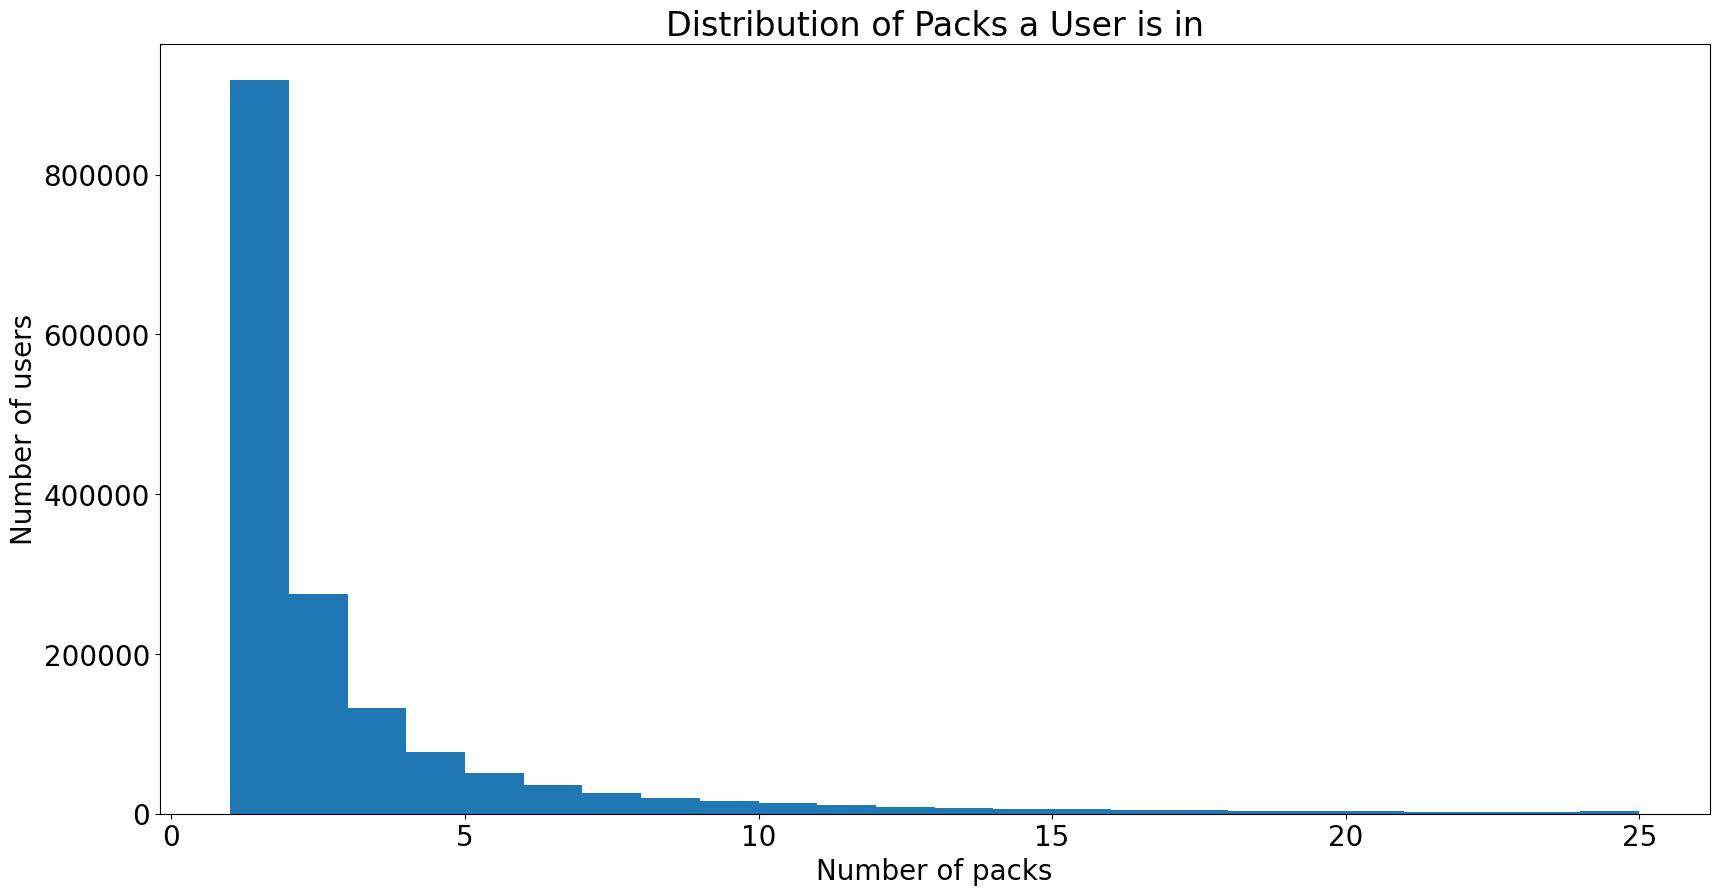

In [7]:
plt.hist(pack_count_per_user, bins=np.linspace(1, 25, 25))

plt.title("Distribution of Packs a User is in")
plt.xlabel("Number of packs")
plt.ylabel("Number of users")
plt.savefig("bsky_plots/number_of_packs_a_user_is_in_linear_scale.png")

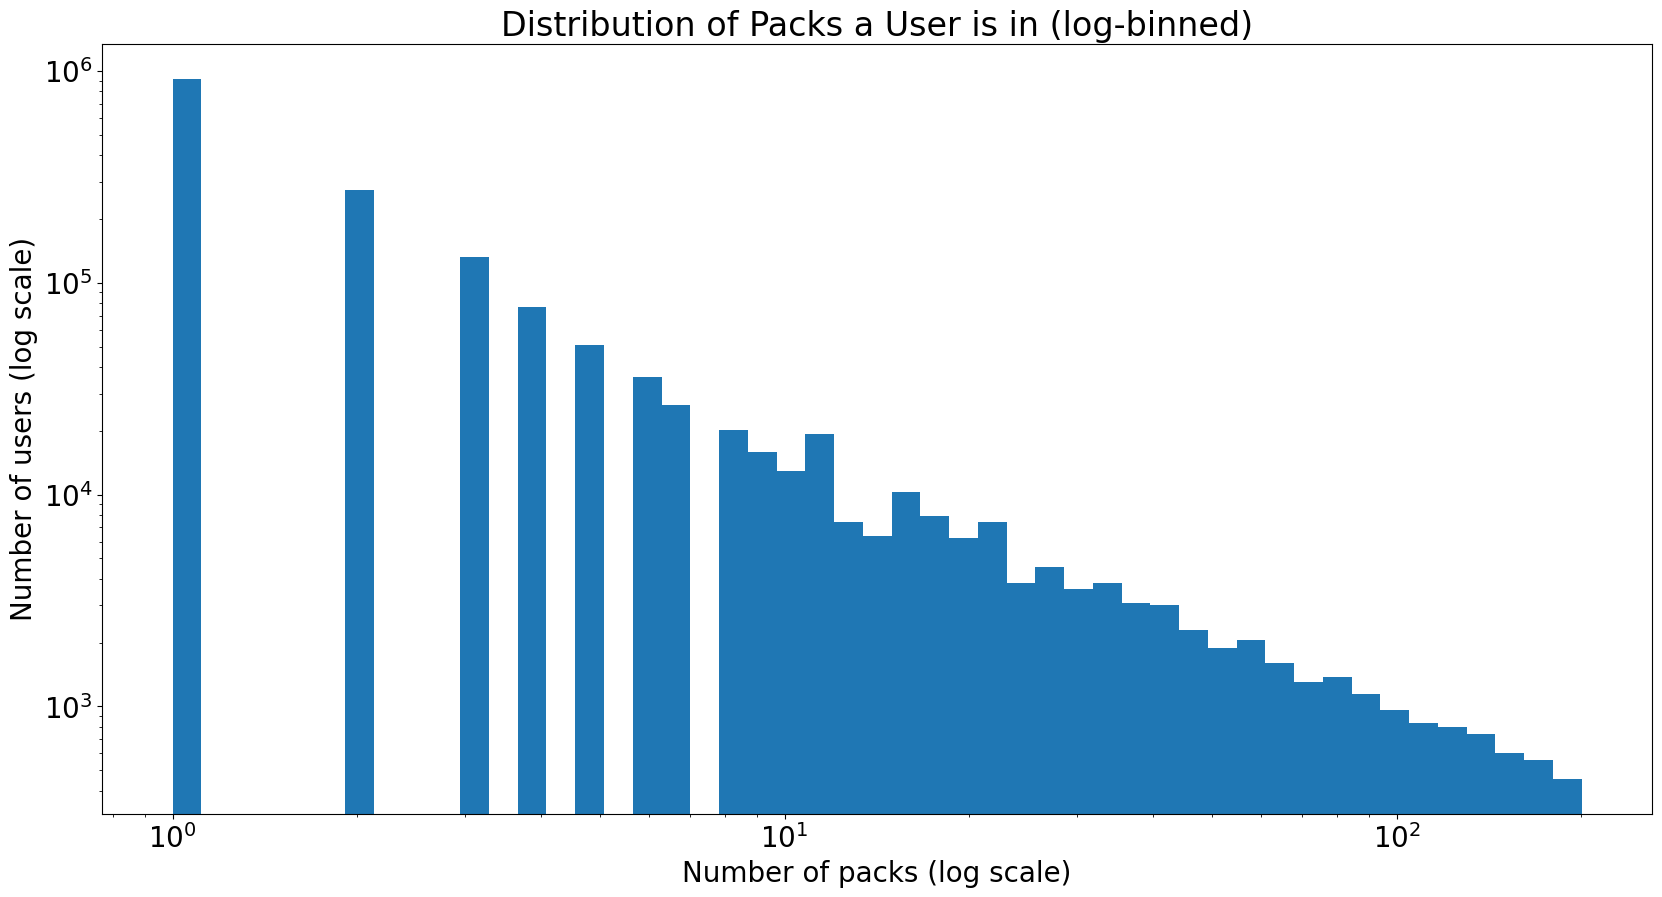

In [8]:
plt.hist(pack_count_per_user, bins=np.logspace(np.log(1), np.log(10), 50))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.title("Distribution of Packs a User is in (log-binned)")
plt.xlabel("Number of packs (log scale)")
plt.ylabel("Number of users (log scale)")
plt.savefig("bsky_plots/number_of_packs_a_user_is_in_log_log.png")

In [9]:
pack_creations_per_user = {}

for sp in data1:
    creator = sp["creator-did"]
    if creator in pack_creations_per_user:
        pack_creations_per_user[creator] += 1
    else:
        pack_creations_per_user[creator] = 1

In [10]:
pack_creation_counts_per_user = [v for v in pack_creations_per_user.values()]
np.mean(pack_creation_counts_per_user), np.median(
    pack_creation_counts_per_user
), np.min(pack_creation_counts_per_user), np.max(pack_creation_counts_per_user)

(1.1414447142429627, 1.0, 1, 664)

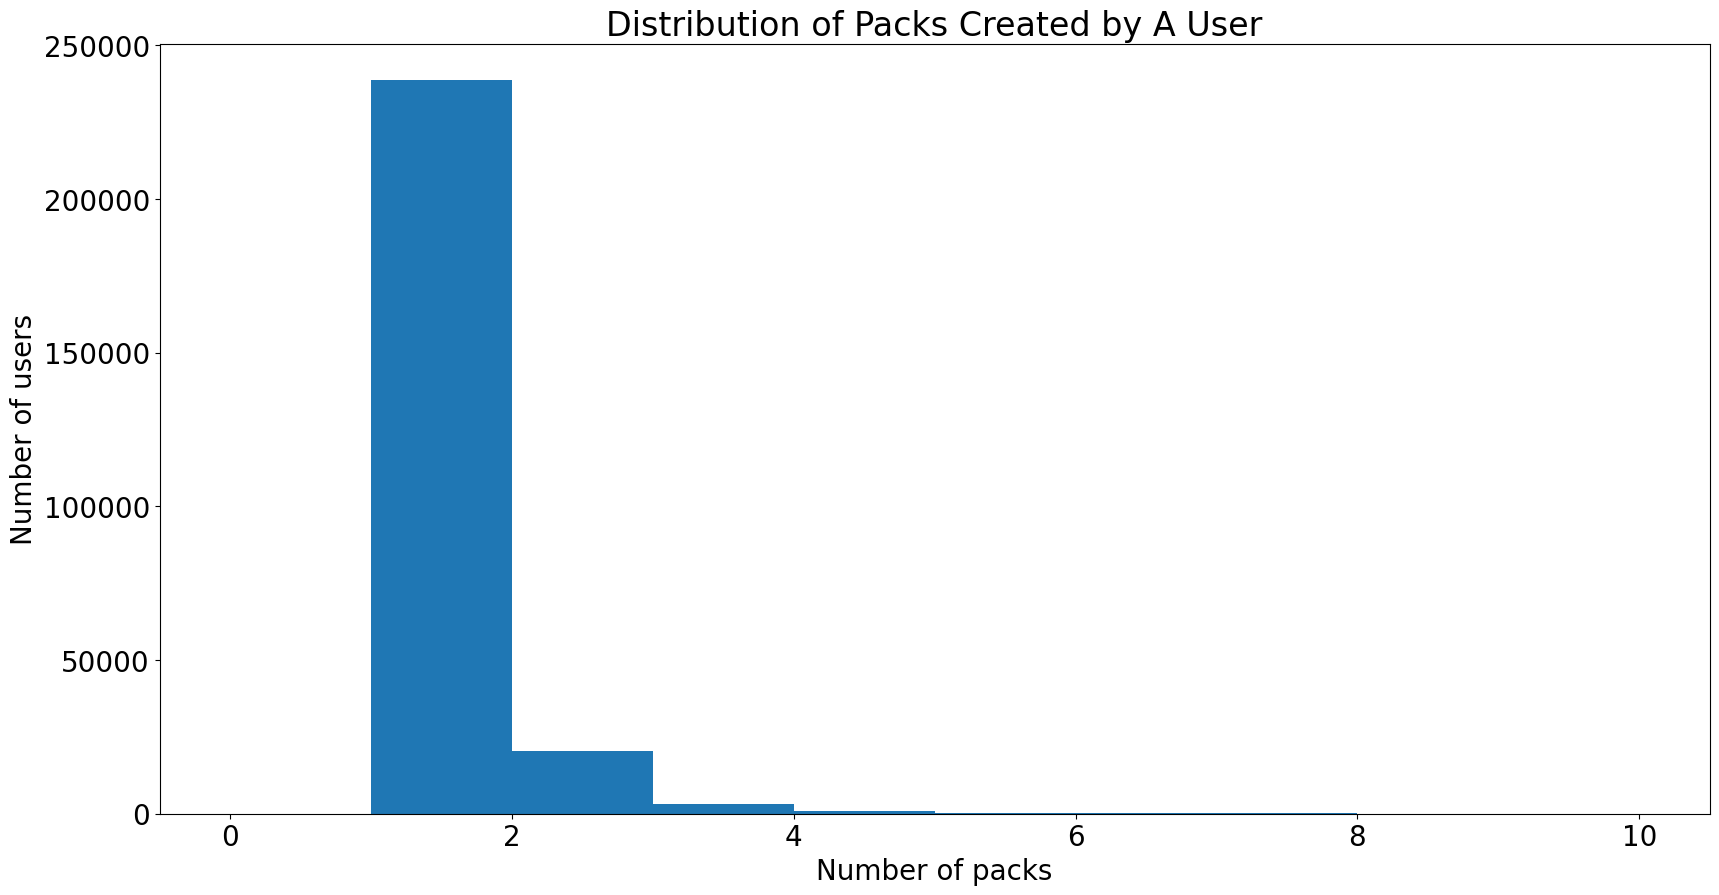

In [11]:
plt.hist(pack_creation_counts_per_user, bins=np.linspace(0, 10, 11))

plt.title("Distribution of Packs Created by A User")
plt.xlabel("Number of packs")
plt.ylabel("Number of users")
plt.savefig("bsky_plots/packs_created_per_user_linear_scale.png")

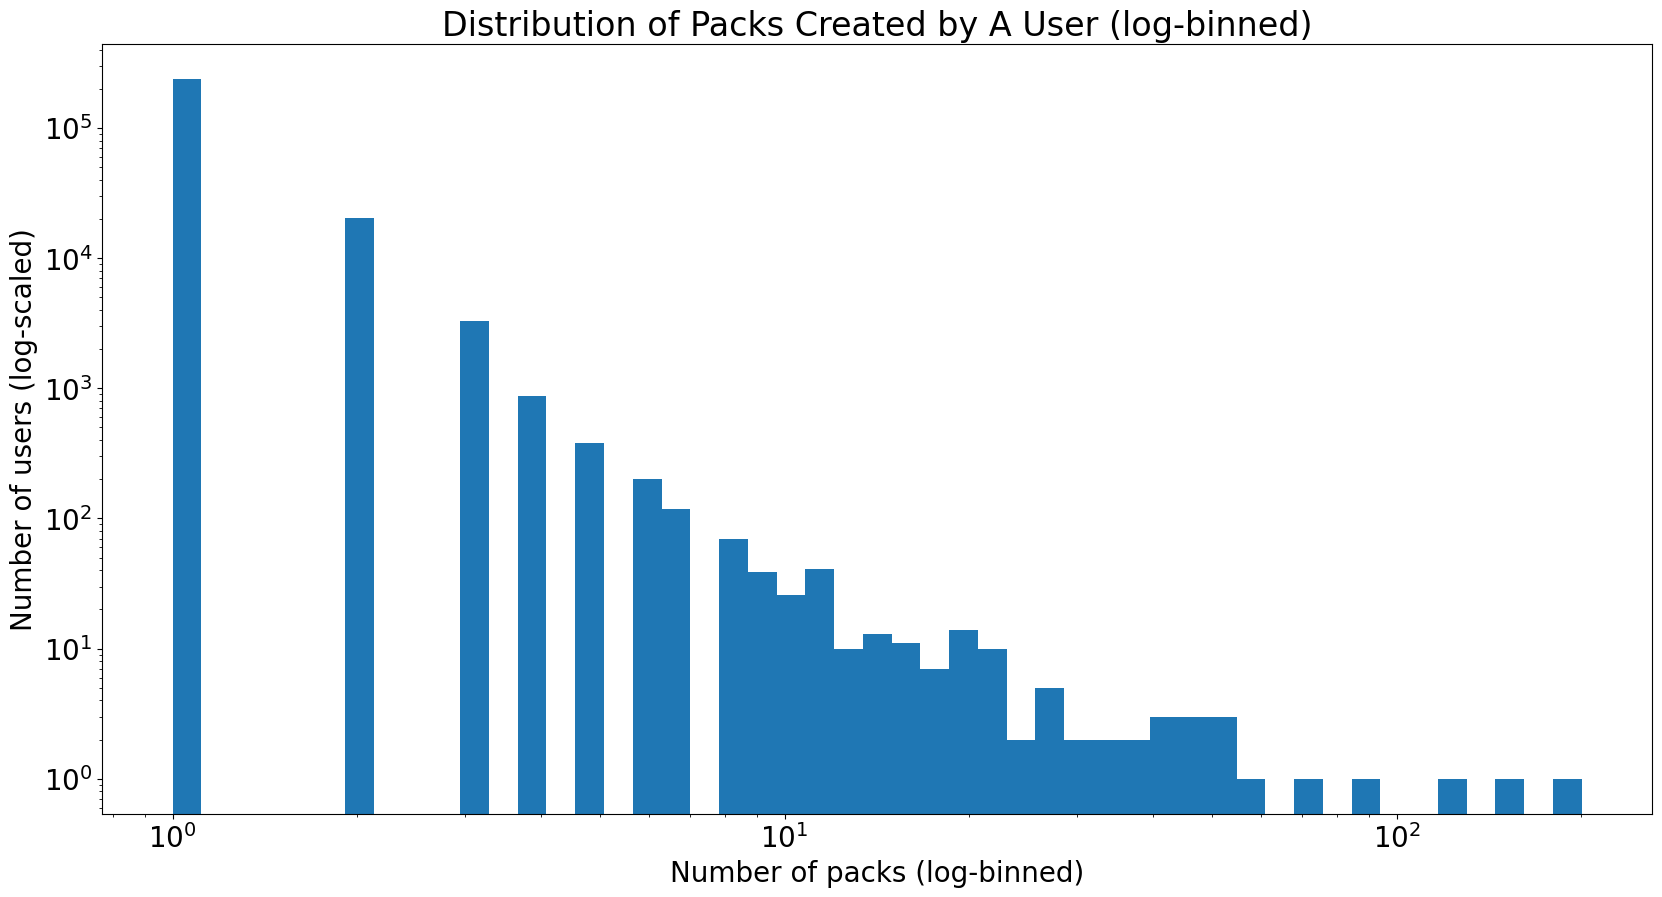

In [12]:
plt.hist(pack_creation_counts_per_user, bins=np.logspace(np.log(1), np.log(10), 50))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")

plt.title("Distribution of Packs Created by A User (log-binned)")
plt.xlabel("Number of packs (log-binned)")
plt.ylabel("Number of users (log-scaled)")
plt.savefig("bsky_plots/packs_created_per_user_log_log.png")

In [23]:
import datetime as dt

import pandas as pd

user_ages = {}
for sp in data1:
    for u in sp["members"]:
        if u["did"] in user_ages:
            continue
        else:
            try:
                user_ages[u["did"]] = (
                    dt.datetime.now()
                    - pd.to_datetime(u["created-at"]).tz_localize(None)
                ).days
            except Exception as e:
                continue

In [24]:
user_age_values = [v for v in user_ages.values()]
np.mean(user_age_values), np.median(user_age_values), np.min(user_age_values), np.max(
    user_age_values
)

(252.3431093975027, 145.0, 1, 810)

In [25]:
len(user_age_values)

1671327

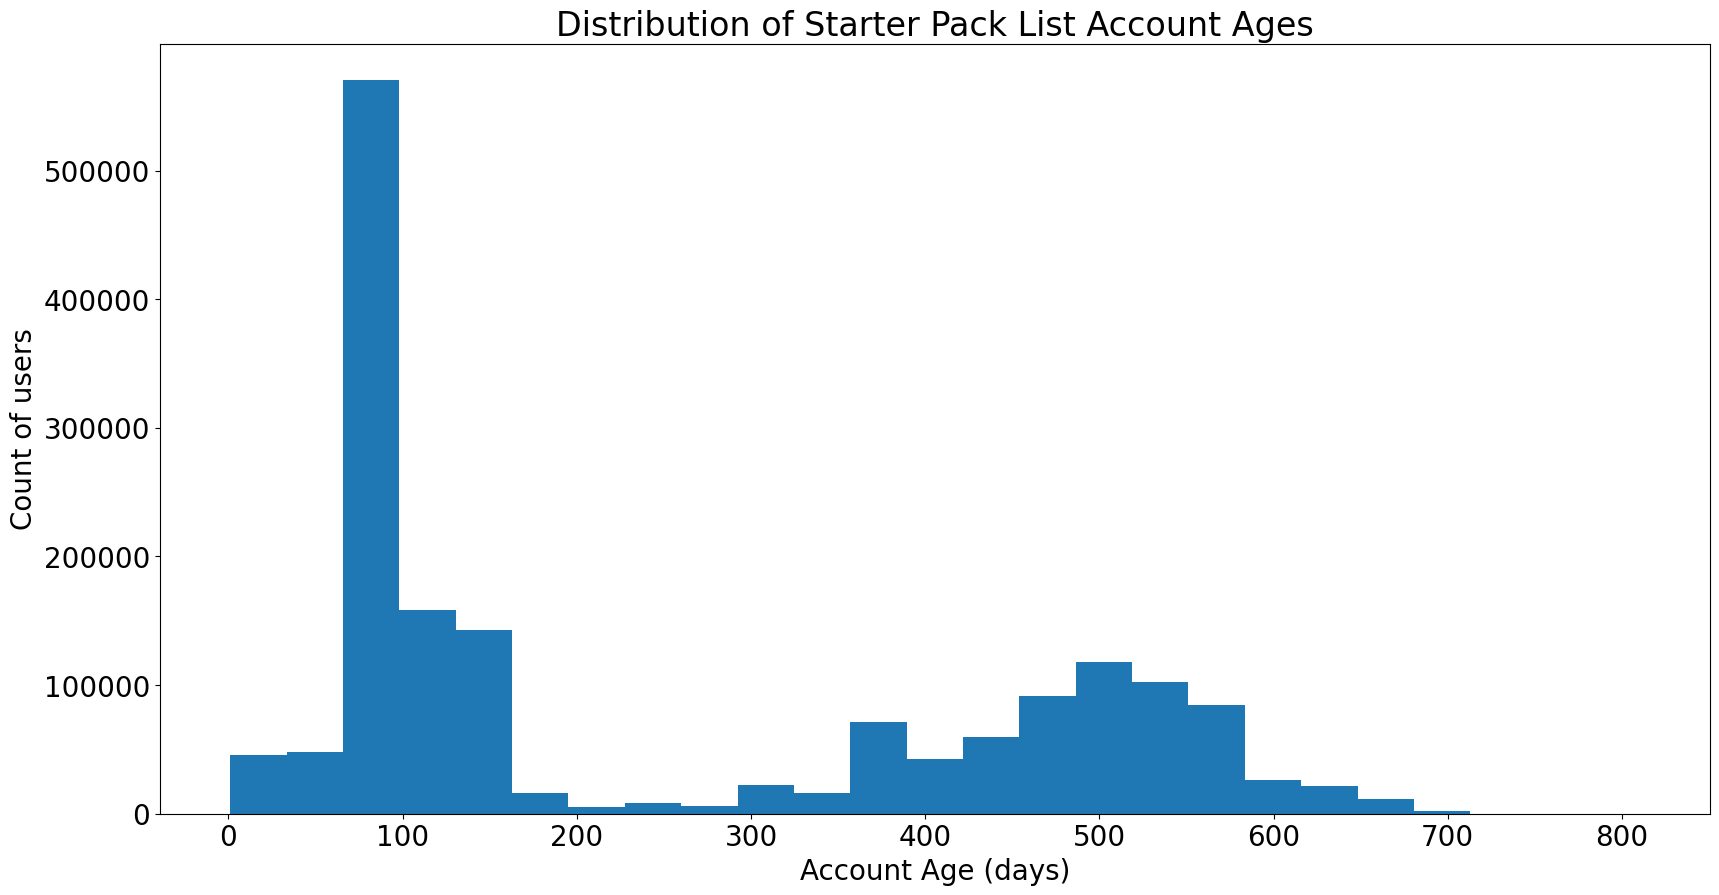

In [26]:
plt.hist(user_age_values, bins=25)
plt.title("Distribution of Starter Pack List Account Ages")
plt.xlabel("Account Age (days)")
plt.ylabel("Count of users")
plt.savefig(
    "bsky_plots/distribution_of_account_ages_unique_accounts_in_starter_packs.png"
)

In [27]:
def try_except_datetime(ts):
    try:
        return pd.to_datetime(ts).round(freq="d")
    except Exception as e:
        return None


cr_ts = [try_except_datetime(pack["created-at"]) for pack in data1]
cr_ts = [ts for ts in cr_ts if ts is not None]

In [28]:
df_cr = pd.DataFrame({"creation_ts": pd.Series(cr_ts)})

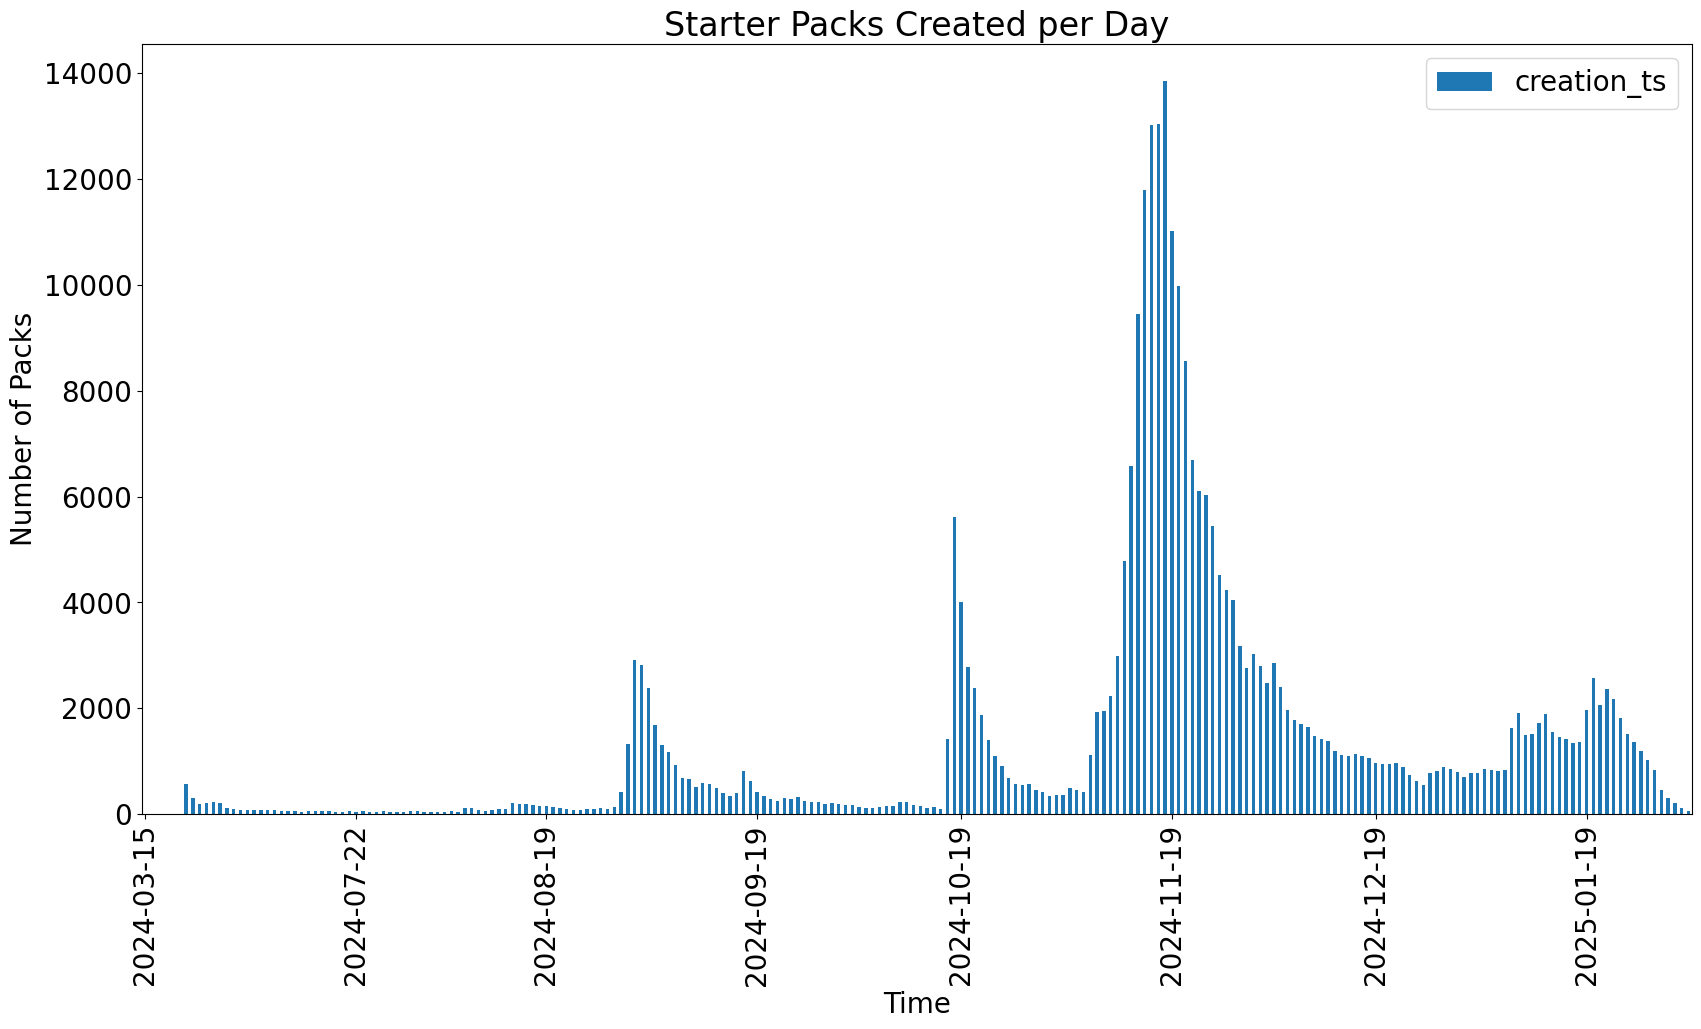

In [29]:
import matplotlib.dates as mdates

plt.rcParams["figure.figsize"] = (20, 10)
ax = df_cr.groupby(df_cr["creation_ts"].dt.date).count().plot(kind="bar")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.set_title("Starter Packs Created per Day")
ax.set_ylabel("Number of Packs")
ax.set_xlabel("Time")
plt.savefig("bsky_plots/starter_packs_created_per_day.png")

In [30]:
creator_ages = {}
for sp in data1:
    if sp["creator-did"] in creator_ages:
        continue
    else:
        try:
            creator_ages[sp["creator-did"]] = (
                dt.datetime.now()
                - pd.to_datetime(sp["creator-created-at"]).tz_localize(None)
            ).days
        except Exception as e:
            continue

In [31]:
len(creator_ages)

263852

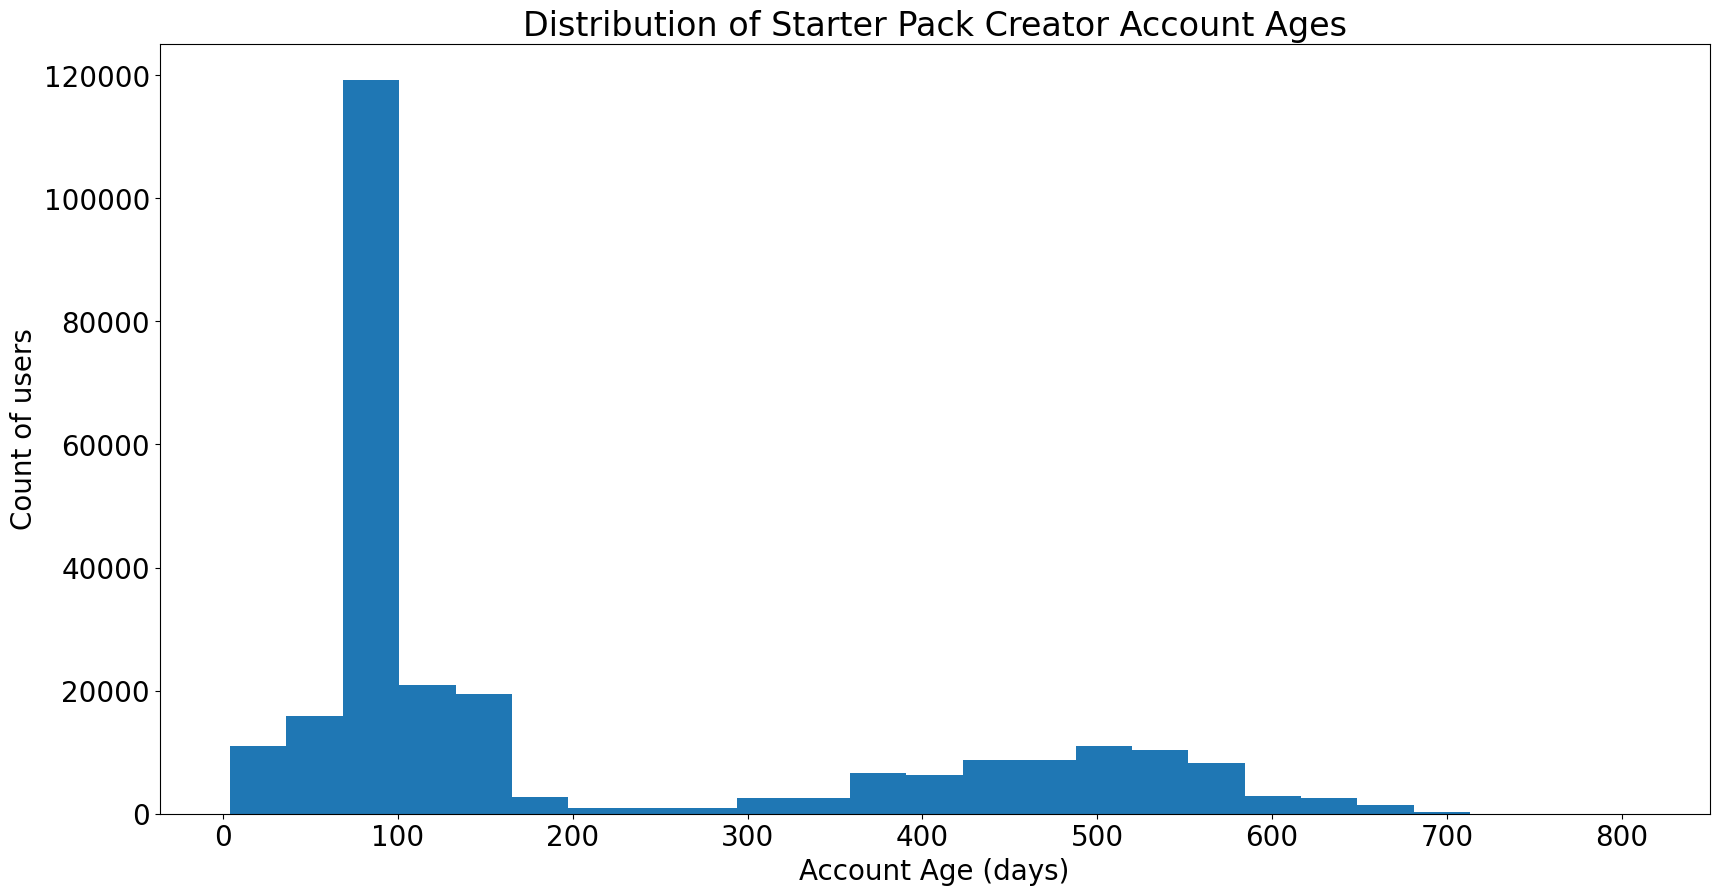

In [32]:
creator_age_values = [v for v in creator_ages.values()]

plt.hist(creator_age_values, bins=25)
plt.title("Distribution of Starter Pack Creator Account Ages")
plt.xlabel("Account Age (days)")
plt.ylabel("Count of users")
plt.savefig("bsky_plots/distribution_of_creator_account_ages_of_starter_packs.png")